### AI3000: Reinforcement Learning

#### Assignment 5

#### Tanmay Goyal

#### AI20BTECH11021

In [1]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import copy

##### Problem 2: Bandit Algorithms

In [27]:
class bandits():

    def __init__(self , K , type_of_mean):
        self.arms = K
        self.var = [1 for i in range(K)]
        self.mean = self.get_mean(type_of_mean) * 10

    def get_mean(self , type_of_mean):
        if type_of_mean == 'well_seperated':
            return np.sort(np.random.random(self.arms))
        else:
            a = np.random.random(self.arms-1).tolist()
            a.append(np.max(np.array(a)) + 0.01)
            return np.sort(a)

    def get_reward(self , arm):
        return np.random.normal(self.mean[arm] , self.var[arm])

    

In [3]:
def greedy(env ,exploration_time , time_horizon):
    rewards = []
    count = [0 for i in range(env.arms)]
    mean_rewards = [0 for i in range(env.arms)]
    regret = []
    reg_sum = 0

    for t in range(exploration_time):
        for i in range(env.arms):
            r = env.get_reward(i)
            rewards.append(r)
            count[i] += 1
            mean_rewards[i] = ((mean_rewards[i] * count[i]-1) + r) / count[i]
            reg_sum += np.max(env.mean) - r
            regret.append(reg_sum)

    for i in range(time_horizon - env.arms):
        arm = np.argmax(np.array(mean_rewards))
        r = env.get_reward(arm)
        rewards.append(r)
        count[arm] += 1
        mean_rewards[arm] = ((mean_rewards[arm] * count[arm]-1) + r) / count[arm]
        reg_sum += np.max(env.mean) - r
        regret.append(reg_sum)
    
    return rewards , count , regret

    

In [4]:
def epsilon_greedy(env , exploration_time , time_horizon , epsilon):
    rewards = [0 for i in range(env.arms)]
    count = [0 for i in range(env.arms)]
    mean_rewards = [0 for i in range(env.arms)]
    regret = []
    reg_sum = 0

    for t in range(exploration_time):
        for i in range(env.arms):
            r = env.get_reward(i)
            rewards.append(r)
            count[i] += 1
            mean_rewards[i] = ((mean_rewards[i] * count[i]-1) + r) / count[i]
            reg_sum += np.max(env.mean) - r
            regret.append(reg_sum)

    for i in range(time_horizon - env.arms):
        if np.random.random() < epsilon:
            arm = np.random.randint(env.arms)
        else:
            arm = np.argmax(np.array(mean_rewards))
        r = env.get_reward(arm)
        rewards.append(r)
        count[arm] += 1
        mean_rewards[arm] = ((mean_rewards[arm] * count[arm]-1) + r) / count[arm]
        reg_sum += np.max(env.mean) - r
        regret.append(reg_sum)
    
    return rewards , count , regret

    

In [5]:
def epsilon_decay(env , exploration_time , time_horizon , epsilon , decay_rate):
    rewards = [0 for i in range(env.arms)]
    count = [0 for i in range(env.arms)]
    mean_rewards = [0 for i in range(env.arms)]
    regret = []
    reg_sum = 0

    for t in range(exploration_time):
        for i in range(env.arms):
            r = env.get_reward(i)
            rewards.append(r)
            count[i] += 1
            mean_rewards[i] = ((mean_rewards[i] * count[i]-1) + r) / count[i]
            reg_sum += np.max(env.mean) - r
            regret.append(reg_sum)

    for i in range(time_horizon - env.arms):
        if np.random.random() < epsilon:
            arm = np.random.randint(env.arms)
        else:
            arm = np.argmax(np.array(mean_rewards))
        r = env.get_reward(arm)
        rewards.append(r)
        count[arm] += 1
        mean_rewards[arm] = ((mean_rewards[arm] * count[arm]-1) + r) / count[arm]
        epsilon = epsilon * decay_rate
        reg_sum += np.max(env.mean) - r
        regret.append(reg_sum)

    return rewards , count , regret

    

In [6]:
def ucb1(env , time_horizon):
    rewards = []
    count = [0 for i in range(env.arms)]
    mean_rewards = [0 for i in range(env.arms)]
    regret = []
    reg_sum = 0

    for i in range(env.arms):
        r = env.get_reward(i)
        rewards.append(r)
        count[i] += 1
        mean_rewards[i] = ((mean_rewards[i] * count[i]-1) + r) / count[i]
        reg_sum += np.max(env.mean) - r
        regret.append(reg_sum)

    for i in range(time_horizon - env.arms):
        arm = np.argmax(np.array(mean_rewards) + np.sqrt(2 * np.log(i+1) / np.array(count)))
        r = env.get_reward(arm)
        rewards.append(r)
        count[arm] += 1
        mean_rewards[arm] = ((mean_rewards[arm] * count[arm]-1) + r) / count[arm]
        reg_sum += np.max(env.mean) - r
        regret.append(reg_sum)
    
    return rewards , count , regret

    

In [7]:
rounds = 1000

reward_greedy = []
reward_eps_greedy1 = []
reward_eps_greedy_2 = []
reward_eps_decay = []
reward_ucb = []

count_greedy = []
count_eps_greedy1 = []
count_eps_greedy_2 = []
count_eps_decay = []
count_ucb = []

regret_greedy = []
regret_eps_greedy1 = []
regret_eps_greedy_2 = []
regret_eps_decay = []
regret_ucb = []

for i in range(rounds):
    env = bandits(10 , 'well_seperated')
    
    r , c , reg = greedy(env , 1 , 1000)
    reward_greedy.append(np.array(r))
    count_greedy.append(np.array(c))
    regret_greedy.append(np.array(reg))
    
    r , c , reg = epsilon_greedy(env , 1 , 1000 , 0.1)
    reward_eps_greedy1.append(np.array(r))
    count_eps_greedy1.append(np.array(c))
    regret_eps_greedy1.append(np.array(reg))
    
    r , c , reg = epsilon_greedy(env , 1 , 1000 , 0.01)
    reward_eps_greedy_2.append(np.array(r))
    count_eps_greedy_2.append(np.array(c))
    regret_eps_greedy_2.append(np.array(reg))
    
    r , c , reg = epsilon_decay(env , 1 , 1000 , 1 , 0.99)
    reward_eps_decay.append(np.array(r))
    count_eps_decay.append(np.array(c))
    regret_eps_decay.append(np.array(reg))
    
    r , c , reg = ucb1(env , 1000)
    reward_ucb.append(np.array(r))
    count_ucb.append(np.array(c))
    regret_ucb.append(np.array(reg))

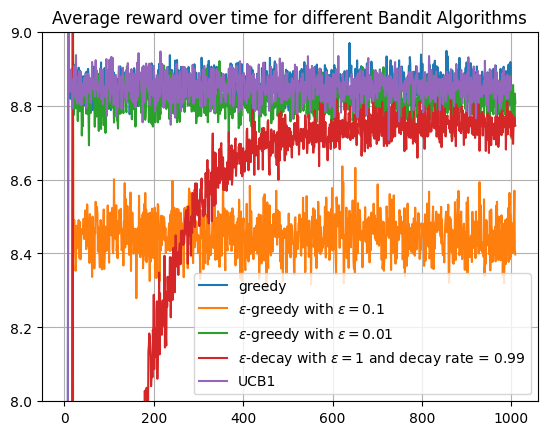

In [8]:
rew_greedy = [np.mean(s) for s in np.array(reward_greedy).T]
rew_eps_greedy1 = [np.mean(s) for s in np.array(reward_eps_greedy1).T]
rew_eps_greedy_2 = [np.mean(s) for s in np.array(reward_eps_greedy_2).T]
rew_eps_decay = [np.mean(s) for s in np.array(reward_eps_decay).T]
rew_ucb = [np.mean(s) for s in np.array(reward_ucb).T]

plt.plot(rew_greedy , label = "greedy")
plt.plot(rew_eps_greedy1 , label = "$\\epsilon$-greedy with $\\epsilon = 0.1$")
plt.plot(rew_eps_greedy_2 , label = "$\\epsilon$-greedy with $\\epsilon = 0.01$")
plt.plot(rew_eps_decay , label = "$\\epsilon$-decay with $\\epsilon = 1$ and decay rate = 0.99")
plt.plot(rew_ucb , label = "UCB1")
plt.legend()
plt.grid()
plt.ylim(8, 9)
plt.title("Average reward over time for different Bandit Algorithms")
plt.show()


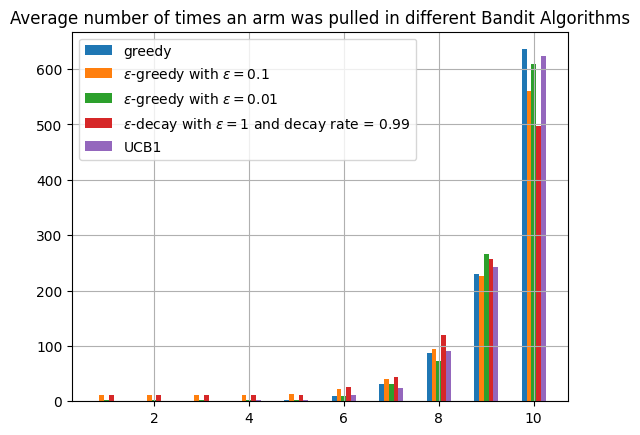

In [9]:
c_greedy = [np.mean(s) for s in np.array(count_greedy).T]
c_eps_greedy1 = [np.mean(s) for s in np.array(count_eps_greedy1).T]
c_eps_greedy_2 = [np.mean(s) for s in np.array(count_eps_greedy_2).T]
c_eps_decay = [np.mean(s) for s in np.array(count_eps_decay).T]
c_ucb = [np.mean(s) for s in np.array(count_ucb).T]

x = [i for i in range(1,11)]
barwidth = 0.1
x1 =  [i - 2 * barwidth for i in x]
x2 = [i - barwidth for i in x]
x3 = [i for i in x]
x4 = [i + barwidth for i in x]
x5 = [i + 2 * barwidth for i in x]

plt.bar(x1 , c_greedy , width = barwidth , label = "greedy")
plt.bar(x2 , c_eps_greedy1 , width = barwidth , label = "$\\epsilon$-greedy with $\\epsilon = 0.1$")
plt.bar(x3 , c_eps_greedy_2 , width = barwidth , label = "$\\epsilon$-greedy with $\\epsilon = 0.01$")
plt.bar(x4 , c_eps_decay , width = barwidth , label = "$\\epsilon$-decay with $\\epsilon = 1$ and decay rate = 0.99")
plt.bar(x5 , c_ucb , width = barwidth , label = "UCB1")
plt.legend()
plt.grid()
plt.title("Average number of times an arm was pulled in different Bandit Algorithms")
plt.show()

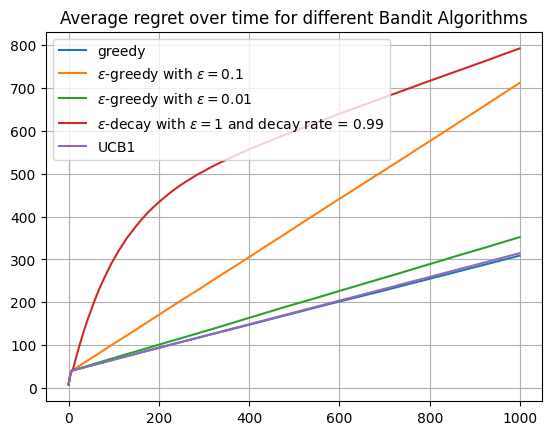

In [10]:
reg_greedy = [np.mean(s) for s in np.array(regret_greedy).T]
reg_eps_greedy1 = [np.mean(s) for s in np.array(regret_eps_greedy1).T]
reg_eps_greedy_2 = [np.mean(s) for s in np.array(regret_eps_greedy_2).T]
reg_eps_decay = [np.mean(s) for s in np.array(regret_eps_decay).T]
reg_ucb = [np.mean(s) for s in np.array(regret_ucb).T]

plt.plot(reg_greedy , label = "greedy")
plt.plot(reg_eps_greedy1 , label = "$\\epsilon$-greedy with $\\epsilon = 0.1$")
plt.plot(reg_eps_greedy_2 , label = "$\\epsilon$-greedy with $\\epsilon = 0.01$")
plt.plot(reg_eps_decay , label = "$\\epsilon$-decay with $\\epsilon = 1$ and decay rate = 0.99")
plt.plot(reg_ucb , label = "UCB1")
plt.legend()
plt.grid()
plt.title("Average regret over time for different Bandit Algorithms")
plt.show()


##### Which Bandit Algorithm is better?

##### Answer:
UCB1 is better becuase it gives more consistent better rewards across all rounds. It explores the more uncertain arms, leading to more exploration, which reduces the chance of locking onto suboptimal arms. It also exploits the more certain arms, leading to more exploitation.

In [28]:
rounds = 1000

reward_greedy = []
reward_eps_greedy1 = []
reward_eps_greedy_2 = []
reward_eps_decay = []
reward_ucb = []

count_greedy = []
count_eps_greedy1 = []
count_eps_greedy_2 = []
count_eps_decay = []
count_ucb = []

regret_greedy = []
regret_eps_greedy1 = []
regret_eps_greedy_2 = []
regret_eps_decay = []
regret_ucb = []

for i in range(rounds):
    env = bandits(10 , '')
    
    r , c , reg = greedy(env , 1 , 1000)
    reward_greedy.append(np.array(r))
    count_greedy.append(np.array(c))
    regret_greedy.append(np.array(reg))
    
    r , c , reg = epsilon_greedy(env , 1 , 1000 , 0.1)
    reward_eps_greedy1.append(np.array(r))
    count_eps_greedy1.append(np.array(c))
    regret_eps_greedy1.append(np.array(reg))
    
    r , c , reg = epsilon_greedy(env , 1 , 1000 , 0.01)
    reward_eps_greedy_2.append(np.array(r))
    count_eps_greedy_2.append(np.array(c))
    regret_eps_greedy_2.append(np.array(reg))
    
    r , c , reg = epsilon_decay(env , 1 , 1000 , 1 , 0.99)
    reward_eps_decay.append(np.array(r))
    count_eps_decay.append(np.array(c))
    regret_eps_decay.append(np.array(reg))
    
    r , c , reg = ucb1(env , 1000)
    reward_ucb.append(np.array(r))
    count_ucb.append(np.array(c))
    regret_ucb.append(np.array(reg))

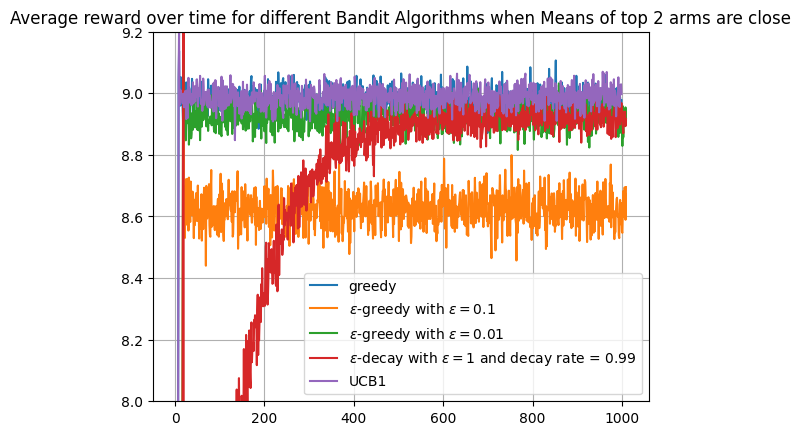

In [32]:
rew_greedy = [np.mean(s) for s in np.array(reward_greedy).T]
rew_eps_greedy1 = [np.mean(s) for s in np.array(reward_eps_greedy1).T]
rew_eps_greedy_2 = [np.mean(s) for s in np.array(reward_eps_greedy_2).T]
rew_eps_decay = [np.mean(s) for s in np.array(reward_eps_decay).T]
rew_ucb = [np.mean(s) for s in np.array(reward_ucb).T]

plt.plot(rew_greedy , label = "greedy")
plt.plot(rew_eps_greedy1 , label = "$\\epsilon$-greedy with $\\epsilon = 0.1$")
plt.plot(rew_eps_greedy_2 , label = "$\\epsilon$-greedy with $\\epsilon = 0.01$")
plt.plot(rew_eps_decay , label = "$\\epsilon$-decay with $\\epsilon = 1$ and decay rate = 0.99")
plt.plot(rew_ucb , label = "UCB1")
plt.legend()
plt.grid()
plt.ylim(8 , 9.2)
plt.title("Average reward over time for different Bandit Algorithms when Means of top 2 arms are close")
plt.show()


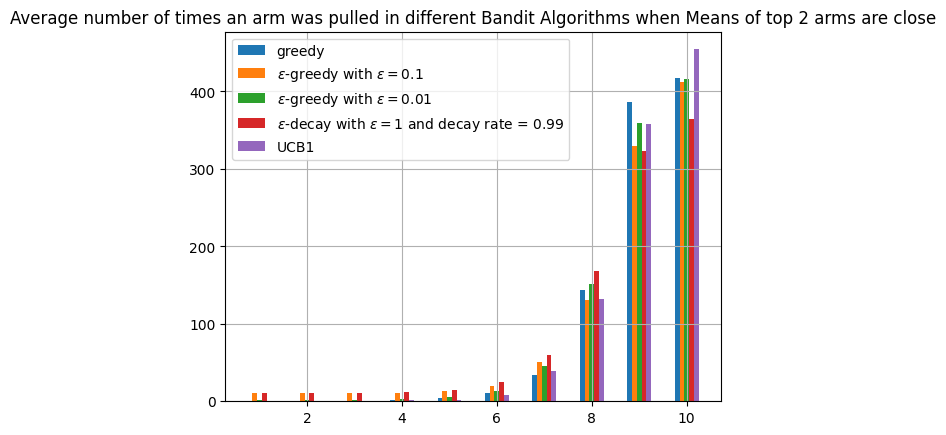

In [30]:
c_greedy = [np.mean(s) for s in np.array(count_greedy).T]
c_eps_greedy1 = [np.mean(s) for s in np.array(count_eps_greedy1).T]
c_eps_greedy_2 = [np.mean(s) for s in np.array(count_eps_greedy_2).T]
c_eps_decay = [np.mean(s) for s in np.array(count_eps_decay).T]
c_ucb = [np.mean(s) for s in np.array(count_ucb).T]

x = [i for i in range(1,11)]
barwidth = 0.1
x1 =  [i - 2 * barwidth for i in x]
x2 = [i - barwidth for i in x]
x3 = [i for i in x]
x4 = [i + barwidth for i in x]
x5 = [i + 2 * barwidth for i in x]

plt.bar(x1 , c_greedy , width = barwidth , label = "greedy")
plt.bar(x2 , c_eps_greedy1 , width = barwidth , label = "$\\epsilon$-greedy with $\\epsilon = 0.1$")
plt.bar(x3 , c_eps_greedy_2 , width = barwidth , label = "$\\epsilon$-greedy with $\\epsilon = 0.01$")
plt.bar(x4 , c_eps_decay , width = barwidth , label = "$\\epsilon$-decay with $\\epsilon = 1$ and decay rate = 0.99")
plt.bar(x5 , c_ucb , width = barwidth , label = "UCB1")
plt.legend()
plt.grid()
plt.title("Average number of times an arm was pulled in different Bandit Algorithms when Means of top 2 arms are close")
plt.show()

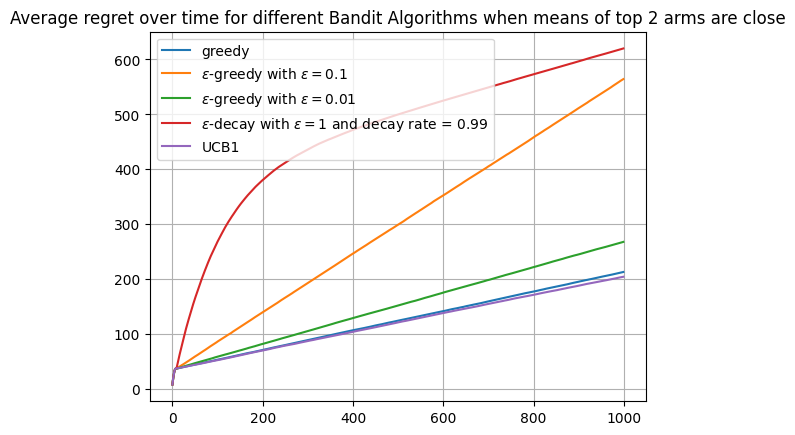

In [31]:
reg_greedy = [np.mean(s) for s in np.array(regret_greedy).T]
reg_eps_greedy1 = [np.mean(s) for s in np.array(regret_eps_greedy1).T]
reg_eps_greedy_2 = [np.mean(s) for s in np.array(regret_eps_greedy_2).T]
reg_eps_decay = [np.mean(s) for s in np.array(regret_eps_decay).T]
reg_ucb = [np.mean(s) for s in np.array(regret_ucb).T]

plt.plot(reg_greedy , label = "greedy")
plt.plot(reg_eps_greedy1 , label = "$\\epsilon$-greedy with $\\epsilon = 0.1$")
plt.plot(reg_eps_greedy_2 , label = "$\\epsilon$-greedy with $\\epsilon = 0.01$")
plt.plot(reg_eps_decay , label = "$\\epsilon$-decay with $\\epsilon = 1$ and decay rate = 0.99")
plt.plot(reg_ucb , label = "UCB1")
plt.legend()
plt.grid()
# plt.ylim(8, 9)
plt.title("Average regret over time for different Bandit Algorithms when means of top 2 arms are close")
plt.show()


##### Problem 3: Monte Carlo Tree Search

In [16]:
class tic_tac_toe():
    
    agent = 'X'
    opponent = 'O'

    def __init__(self , board_is_given , given_board):
        if not board_is_given:
            self.board = [['_' for i in range(3)]for i in range(3)]
            self.tuple_board = tuple([tuple(i) for i in self.board]) # making board hashable
            self.full_agent = []
            self.full_opponent = []
            self.empty = [i for i in range(9)]
        else:
            self.board = given_board
            self.tuple_board = tuple([tuple(i) for i in self.board])
            self.full_agent = [i for i in range(9) if self.board[i//3][i%3] == 'X']
            self.full_opponent = [i for i in range(9) if self.board[i//3][i%3] == 'O']
            self.empty = [i for i in range(9) if self.board[i//3][i%3] == '_']
    
    def tupling_board(self):
        # conversion from unhashable list to hashable tuple
        return tuple([tuple(i) for i in self.board])

    def act(self , action , player):
        # check for validity of action taken
        if action in self.empty:
            if player == "opponent":
                self.board[action//3][action%3] = self.opponent
                self.full_opponent.append(action)
            else:
                self.board[action//3][action%3] = self.agent
                self.full_agent.append(action)
            
            self.empty.remove(action)
            return action
        
        else:
            return
    
    def print_board(self):
        print(self.board)

    def game_end(self):
        return len(self.empty) == 0

    def random_agent(self):
        a = random.randint(0 , len(self.empty)-1)
        return self.empty[a]

    def safe_agent(self):
        # winning/ blocking moves
        a = -1
        if (1 in self.full_agent and 2 in self.full_agent) or (3 in self.full_agent and 6 in self.full_agent) or (4 in self.full_agent and 8 in self.full_agent):
            a = 0
        elif (0 in self.full_agent and 2 in self.full_agent) or (4 in self.full_agent and 7 in self.full_agent):
            a = 1
        elif (0 in self.full_agent and 1 in self.full_agent) or (5 in self.full_agent and 8 in self.full_agent) or (4 in self.full_agent and 6 in self.full_agent):
            a = 2
        elif (0 in self.full_agent and 6 in self.full_agent) or (4 in self.full_agent and 5 in self.full_agent):
            a = 3
        elif (1 in self.full_agent and 7 in self.full_agent) or (3 in self.full_agent and 5 in self.full_agent) or (0 in self.full_agent and 8 in self.full_agent) or (2 in self.full_agent and 6 in self.full_agent):
            a = 4
        elif (3 in self.full_agent and 4 in self.full_agent) or (2 in self.full_agent and 8 in self.full_agent):
            a = 5
        elif (0 in self.full_agent and 3 in self.full_agent) or (7 in self.full_agent and 8 in self.full_agent) or (2 in self.full_agent and 4 in self.full_agent):
            a = 6
        elif (6 in self.full_agent and 8 in self.full_agent) or (1 in self.full_agent and 4 in self.full_agent):
            a = 7
        elif (0 in self.full_agent and 4 in self.full_agent) or (6 in self.full_agent and 7 in self.full_agent) or (2 in self.full_agent and 5 in self.full_agent):
            a = 8
        if a < 0 : # if winning move not found
            if (1 in self.full_opponent and 2 in self.full_opponent) or (3 in self.full_opponent and 6 in self.full_opponent) or (4 in self.full_opponent and 8 in self.full_opponent):
                a = 0
            elif (0 in self.full_opponent and 2 in self.full_opponent) or (4 in self.full_opponent and 7 in self.full_opponent):
                a = 1
            elif (0 in self.full_opponent and 1 in self.full_opponent) or (5 in self.full_opponent and 8 in self.full_opponent) or (4 in self.full_opponent and 6 in self.full_opponent):
                a = 2
            elif (0 in self.full_opponent and 6 in self.full_opponent) or (4 in self.full_opponent and 5 in self.full_opponent):
                a = 3
            elif (1 in self.full_opponent and 7 in self.full_opponent) or (3 in self.full_opponent and 5 in self.full_opponent) or (0 in self.full_opponent and 8 in self.full_opponent) or (2 in self.full_opponent and 6 in self.full_opponent):
                a = 4
            elif (3 in self.full_opponent and 4 in self.full_opponent) or (2 in self.full_opponent and 8 in self.full_opponent):
                a = 5
            elif (0 in self.full_opponent and 3 in self.full_opponent) or (7 in self.full_opponent and 8 in self.full_opponent) or (2 in self.full_opponent and 4 in self.full_opponent):
                a = 6
            elif (6 in self.full_opponent and 8 in self.full_opponent) or (1 in self.full_opponent and 4 in self.full_opponent):
                a = 7
            elif (0 in self.full_opponent and 4 in self.full_opponent) or (6 in self.full_opponent and 7 in self.full_opponent) or (2 in self.full_opponent and 5 in self.full_opponent):
                a = 8
        
        if a < 0:
            a = random.randint(0 , len(self.empty)-1)
            return self.empty[a]
        else:
            return a

    def win_game(self , player):
        board_transpose = [[self.board[i][j] for i in range(3)] for j in range(3)]
        if player == 'opponent':
            if ['O' , 'O' , 'O'] in self.board:
                return True
            elif ['O' , 'O' , 'O'] in board_transpose:
                return True
            elif (0 in self.full_opponent and 4 in self.full_opponent and 8 in self.full_opponent) or (2 in self.full_opponent and 4 in self.full_opponent and 6 in self.full_opponent):            
                return True
            else:
                 return False

        else:
            if ['X' , 'X' , 'X'] in self.board:
                return True
            elif ['X' , 'X' , 'X'] in board_transpose:
                return True
            elif (0 in self.full_agent and 4 in self.full_agent and 8 in self.full_agent) or (2 in self.full_agent and 4 in self.full_agent and 6 in self.full_agent):
                return True
            else:
                 return False

    def reset_game(self):
        self.board = [['_' for i in range(3)]for i in range(3)]
        self.full_agent= []
        self.full_opponent = []
        self.empty = [i for i in range(9)]

In [17]:
def play_opp(game , player):
    t_board = tuple([tuple(i) for i in game.board])
    if player == 'random':
        a = game.act(game.random_agent() , 'opponent')
    elif player == "choose":
        s = random.randint(0,1)
        if s == 0:
            a = game.act(game.safe_agent() , 'opponent')
        else:
            a = game.act(game.random_agent() , 'opponent')
    else:
        a = game.act(game.safe_agent() , 'opponent')


In [18]:
def play_agent(game, player):
    # original board
    t_board = tuple([tuple(i) for i in game.board])
    sorted = np.argsort(game.q_table[game.tupling_board()])
    for i in range(len(sorted)):
        a = game.act(sorted[i] , "agent")
        if a is not None:
            break


In [19]:
class Node():

    def __init__(self , game , parent):
        self.game = game
        self.board = game.board
        self.parent = parent
        if game.win_game("agent") or game.win_game("opponent") or game.game_end():
            self.terminal = True
        else:
            self.terminal = False
        self.fully_expanded = self.terminal
        self.visits = 0
        self.wins = 0
        self.children = []
        
    def print_state(self):
        print(self.board)

In [20]:
class MCTS():

    def search(self , game , player , iters):
        self.game = game
        self.root = Node(game , None)
        self.player = player
        for iter in range(iters):
            node = self.select(self.root)
            score = self.rollout(self.game)
            self.backpropagate(node , score)
        return self.get_best_child(self.root , 0)

    
    def select(self , node):
        while node.terminal == False:
            if node.fully_expanded:
                node = self.get_best_move(node , 2)
            else:
                return self.expand(node)
        return node

    def expand(self , node):
        potential_moves = node.game.empty
        for move in potential_moves:
            new_board = copy.deepcopy(node.game)
            new_board.act(move , self.player)
            
            if new_board not in node.children:
                child = Node(new_board , node)
                node.children.append(child)
                
                if len(node.game.empty) == node.children:
                    node.fully_expanded = True
                
                return child

    def rollout(self ,game):
        while not self.game.win_game("agent") or not self.game.win_game("opponent") or not self.game.game_end():
            if self.player == "agent":
                if len(game.empty) == 0:
                    return 0
                else:
                    move = random.choice(game.empty)
                    game.act(move , "agent")
                if not self.game.win_game("agent") or not self.game.win_game("opponent") or not self.game.game_end():
                    if len(game.empty) == 0:
                        return 0
                    else:
                        move = random.choice(game.empty)
                        game.act(move , "opponent")
                else:
                    break

            else:
                if len(game.empty) == 0:
                    return 0
                else:
                    move = random.choice(game.empty)
                    game.act(move , "opponent")
                if not self.game.win_game("agent") or not self.game.win_game("opponent") or not self.game.game_end():
                    if len(game.empty) == 0:
                        return 0
                    else:
                        move = random.choice(game.empty)
                        game.act(move , "agent")
                else:
                    break

        if self.game.win_game(self.player):
            return 1
        else:
            return -1


    def backpropagate(self , node , score):
        while node is not None:
            node.visits += 1
            node.wins += score
            node = node.parent

    def get_best_child(self , node , c):
        best_score = float('-inf')
        best_child = None
        for child in node.children:
            score = child.wins / child.visits + c * np.sqrt((2 * np.log(node.visits) / child.visits))
            if score > best_score:
                best_score = score
                best_child = child
        return best_child



##### a) When agent is one move away from win

In [21]:
game = tic_tac_toe(True , [['_' , 'X' , 'O'] , ['_' , 'X' , '_'] , ['O' , '_' , '_']])
mcts = MCTS()
mcts.search(game, "agent" , 10000).print_state()

[['X', 'X', 'O'], ['_', 'X', '_'], ['O', '_', '_']]


##### b) When agent is one move away from loss

In [22]:
game = tic_tac_toe(True , [['_' , 'O' , 'X'] , ['_' , 'O' , '_'] , ['X' , '_' , '_']])
mcts = MCTS()
mcts.search(game, "opponent" , 10000).print_state()

[['O', 'O', 'X'], ['_', 'O', '_'], ['X', '_', '_']]


##### c) When opponent plays first in center square

In [23]:
game = tic_tac_toe(True , [['_' , '_' , '_'] , ['_' , 'O' , '_'] , ['_' , '_' , '_']])
mcts = MCTS()
mcts.search(game, "agent" , 10000).print_state()

[['X', '_', '_'], ['_', 'O', '_'], ['_', '_', '_']]


##### Playing against random agent

In [24]:
# Against random agent
mcts = MCTS()
wins = 0
losses = 0
ties = 0

for g in range(1000):
    # choosing who to start
    game = tic_tac_toe(False , '')
    start = random.randint(0,1)
   
    if start == 0:
        while not game.win_game("agent") or not game.win_game("opponent") or not game.game_end():

            # mcts plays
            game = tic_tac_toe(True , mcts.search(game, "agent" , 10000).board)
            if game.win_game("agent"):
                wins += 1
                break
            elif game.win_game("opponent"):
                losses += 1
                break
            elif game.game_end():
                ties += 1
                break

            #  random opponent plays
            play_opp(game , "random")
            if game.win_game("agent"):
                wins += 1
                break
            elif game.win_game("opponent"):
                losses += 1
                break
            elif game.game_end():
                ties += 1
                break
    
    else:
        while not game.win_game("agent") or not game.win_game("opponent") or not game.game_end():

            #  random opponent plays
            play_opp(game , "random")
            if game.win_game("agent"):
                wins += 1
                break
            elif game.win_game("opponent"):
                losses += 1
                break
            elif game.game_end():
                ties += 1
                break
            
            # mcts plays
            game = tic_tac_toe(True , mcts.search(game, "agent" , 10000).board)
            if game.win_game("agent"):
                wins += 1
                break
            elif game.win_game("opponent"):
                losses += 1
                break
            elif game.game_end():
                ties += 1
                break


       
print("Against Random opponent\n")
print("Wins : {}".format(wins))
print("Losses : {}".format(losses))
print("Draws : {}".format(ties))



Against Random opponent

Wins : 619
Losses : 350
Draws : 31


##### Playing against safe agent

In [25]:
# Against safe agent
mcts = MCTS()
wins = 0
losses = 0
ties = 0

for g in range(1000):
    # choosing who to start
    game = tic_tac_toe(False , '')
    start = random.randint(0,1)
   
    if start == 0:
        while not game.win_game("agent") or not game.win_game("opponent") or not game.game_end():

            # mcts plays
            game = tic_tac_toe(True , mcts.search(game, "agent" , 10000).board)
            if game.win_game("agent"):
                wins += 1
                break
            elif game.win_game("opponent"):
                losses += 1
                break
            elif game.game_end():
                ties += 1
                break

            #  safe opponent plays
            play_opp(game , "safe")
            if game.win_game("agent"):
                wins += 1
                break
            elif game.win_game("opponent"):
                losses += 1
                break
            elif game.game_end():
                ties += 1
                break
    
    else:
        while not game.win_game("agent") or not game.win_game("opponent") or not game.game_end():

            #  safe opponent plays
            play_opp(game , "safe")
            if game.win_game("agent"):
                wins += 1
                break
            elif game.win_game("opponent"):
                losses += 1
                break
            elif game.game_end():
                ties += 1
                break
            
            # mcts plays
            game = tic_tac_toe(True , mcts.search(game, "agent" , 10000).board)
            if game.win_game("agent"):
                wins += 1
                break
            elif game.win_game("opponent"):
                losses += 1
                break
            elif game.game_end():
                ties += 1
                break


       
print("Against Safe opponent\n")
print("Wins : {}".format(wins))
print("Losses : {}".format(losses))
print("Draws : {}".format(ties))



Against Safe opponent

Wins : 965
Losses : 35
Draws : 0


##### MCTS vs MCTS

In [26]:
# Against random agent
mcts_agent = MCTS()
mcts_opponent = MCTS()
wins = 0
losses = 0
ties = 0

for g in range(1000):
    # choosing who to start
    game = tic_tac_toe(False , '')
    start = random.randint(0,1)
   
    if start == 0:
        while not game.win_game("agent") or not game.win_game("opponent") or not game.game_end():

            # mcts_agent plays
            game = tic_tac_toe(True , mcts_agent.search(game, "agent" , 1000).board)
            if game.win_game("agent"):
                wins += 1
                break
            elif game.win_game("opponent"):
                losses += 1
                break
            elif game.game_end():
                ties += 1
                break

            #  random opponent plays
            game = tic_tac_toe(True , mcts_opponent.search(game, "opponent" , 1000).board)
            if game.win_game("agent"):
                wins += 1
                break
            elif game.win_game("opponent"):
                losses += 1
                break
            elif game.game_end():
                ties += 1
                break
    
    else:
        while not game.win_game("agent") or not game.win_game("opponent") or not game.game_end():

            #  random opponent plays
            game = tic_tac_toe(True , mcts_opponent.search(game, "opponent" , 1000).board)
            if game.win_game("agent"):
                wins += 1
                break
            elif game.win_game("opponent"):
                losses += 1
                break
            elif game.game_end():
                ties += 1
                break
            
            # mcts plays
            game = tic_tac_toe(True , mcts_agent.search(game, "agent" , 1000).board)
            if game.win_game("agent"):
                wins += 1
                break
            elif game.win_game("opponent"):
                losses += 1
                break
            elif game.game_end():
                ties += 1
                break


       
print("MCTS vs MCTS\n")
print("Wins : {}".format(wins))
print("Losses : {}".format(losses))
print("Draws : {}".format(ties))



MCTS vs MCTS

Wins : 485
Losses : 515
Draws : 0
